# Preprocess data
### Imports

In [1]:
from power_prediction.preprocess_data import read_input, convert_date, combine_power_consumption, clean_humidity, plot_data, add_corona_feature, data_cleaning_strategy_1, data_cleaning_strategy_2, data_cleaning_strategy_3, clean_time_sync, clean_typ

### Read formatted data
###### Read the input csv

In [2]:
df = read_input()
df.head()

,Unnamed: 0,Date,Value_NE5,Value_NE7,Hr [%Hr],RainDur [min],StrGlo [W/m2],T [°C],WD [°],WVs [m/s],WVv [m/s],p [hPa],Vacation,Holiday
0,0,2014-12-31 23:00:00+00:00,65674.7507,135628.059644,89.25,0.0,0.02,-2.09,20.41,1.40,1.40,982.80,1.0,1.0
1,1,2015-01-01 00:00:00+00:00,88747.5885,172742.750946,90.47,0.0,0.01,-2.48,353.85,0.61,0.60,982.64,1.0,1.0
2,2,2015-01-01 01:00:00+00:00,86864.5321,173541.200194,89.45,0.0,0.02,-2.46,21.48,1.31,1.31,983.00,1.0,1.0
3,3,2015-01-01 02:00:00+00:00,84158.7339,162802.863240,89.20,0.0,0.02,-2.63,12.22,1.70,1.66,982.93,1.0,1.0
4,4,2015-01-01 03:00:00+00:00,81133.3041,154123.513780,89.56,0.0,0.02,-2.77,8.30,1.23,1.21,983.03,1.0,1.0


### Add Date features
###### Add Date features Date_format, Year, Month, Day, Hour, Weekday.
###### The features Date_format has the typ datetime

In [3]:
convert_date(df)
df.head()

,Unnamed: 0,Date,Value_NE5,Value_NE7,Hr [%Hr],RainDur [min],StrGlo [W/m2],T [°C],WD [°],WVs [m/s],WVv [m/s],p [hPa],Vacation,Holiday,Date_format,Year,Month,Day,Hour,Weekday
0,0,2014-12-31 23:00:00+00:00,65674.7507,135628.059644,89.25,0.0,0.02,-2.09,20.41,1.40,1.40,982.80,1.0,1.0,2014-12-31 23:00:00+00:00,2014,12,31,23,3
1,1,2015-01-01 00:00:00+00:00,88747.5885,172742.750946,90.47,0.0,0.01,-2.48,353.85,0.61,0.60,982.64,1.0,1.0,2015-01-01 00:00:00+00:00,2015,1,1,0,4
2,2,2015-01-01 01:00:00+00:00,86864.5321,173541.200194,89.45,0.0,0.02,-2.46,21.48,1.31,1.31,983.00,1.0,1.0,2015-01-01 01:00:00+00:00,2015,1,1,1,4
3,3,2015-01-01 02:00:00+00:00,84158.7339,162802.863240,89.20,0.0,0.02,-2.63,12.22,1.70,1.66,982.93,1.0,1.0,2015-01-01 02:00:00+00:00,2015,1,1,2,4
4,4,2015-01-01 03:00:00+00:00,81133.3041,154123.513780,89.56,0.0,0.02,-2.77,8.30,1.23,1.21,983.03,1.0,1.0,2015-01-01 03:00:00+00:00,2015,1,1,3,4


### Combine NE5 and NE7
###### Add the feature NE_tot
###### In category NE5, there are companies with high energy consumption, such as shopping malls or industry.
###### In category NE7, you will find smaller businesses, like offices, as well as all households.



In [4]:
combine_power_consumption(df)
df.head()

,Unnamed: 0,Date,Value_NE5,Value_NE7,Hr [%Hr],RainDur [min],StrGlo [W/m2],T [°C],WD [°],WVs [m/s],...,p [hPa],Vacation,Holiday,Date_format,Year,Month,Day,Hour,Weekday,NE_tot
0,0,2014-12-31 23:00:00+00:00,65674.7507,135628.059644,89.25,0.0,0.02,-2.09,20.41,1.40,...,982.80,1.0,1.0,2014-12-31 23:00:00+00:00,2014,12,31,23,3,201302.810344
1,1,2015-01-01 00:00:00+00:00,88747.5885,172742.750946,90.47,0.0,0.01,-2.48,353.85,0.61,...,982.64,1.0,1.0,2015-01-01 00:00:00+00:00,2015,1,1,0,4,261490.339446
2,2,2015-01-01 01:00:00+00:00,86864.5321,173541.200194,89.45,0.0,0.02,-2.46,21.48,1.31,...,983.00,1.0,1.0,2015-01-01 01:00:00+00:00,2015,1,1,1,4,260405.732294
3,3,2015-01-01 02:00:00+00:00,84158.7339,162802.863240,89.20,0.0,0.02,-2.63,12.22,1.70,...,982.93,1.0,1.0,2015-01-01 02:00:00+00:00,2015,1,1,2,4,246961.597140
4,4,2015-01-01 03:00:00+00:00,81133.3041,154123.513780,89.56,0.0,0.02,-2.77,8.30,1.23,...,983.03,1.0,1.0,2015-01-01 03:00:00+00:00,2015,1,1,3,4,235256.817880


### Check duplicates and NaN values
###### There are no duplicates but some NaN values

In [5]:
print('Are any duplicates', df.duplicated().any())
print()
print(df.isna().any())

Are any duplicates False

Unnamed: 0       False
Date             False
Value_NE5         True
Value_NE7         True
Hr [%Hr]          True
RainDur [min]     True
StrGlo [W/m2]     True
T [°C]            True
WD [°]            True
WVs [m/s]         True
WVv [m/s]         True
p [hPa]           True
Vacation         False
Holiday          False
Date_format      False
Year             False
Month            False
Day              False
Hour             False
Weekday          False
NE_tot            True
dtype: bool


### Check time synchronization
###### In the end of the input csv, there are no values for the column "Value_NE5" and "Value_NE7"
###### Remove the last rows with the NaN values.

In [6]:
df.tail()

,Unnamed: 0,Date,Value_NE5,Value_NE7,Hr [%Hr],RainDur [min],StrGlo [W/m2],T [°C],WD [°],WVs [m/s],...,p [hPa],Vacation,Holiday,Date_format,Year,Month,Day,Hour,Weekday,NE_tot
85520,85520,2024-10-03 07:00:00+00:00,NaN,NaN,80.72,0.0,183.38,9.81,32.14,2.23,...,960.52,0.0,0.0,2024-10-03 07:00:00+00:00,2024,10,3,7,4,NaN
85521,85521,2024-10-03 08:00:00+00:00,NaN,NaN,77.82,0.0,136.62,10.56,44.54,2.39,...,960.80,0.0,0.0,2024-10-03 08:00:00+00:00,2024,10,3,8,4,NaN
85522,85522,2024-10-03 09:00:00+00:00,NaN,NaN,77.00,0.0,132.71,11.08,35.11,2.19,...,960.95,0.0,0.0,2024-10-03 09:00:00+00:00,2024,10,3,9,4,NaN
85523,85523,2024-10-03 10:00:00+00:00,NaN,NaN,73.96,0.0,222.88,11.86,29.24,2.67,...,960.94,0.0,0.0,2024-10-03 10:00:00+00:00,2024,10,3,10,4,NaN
85524,85524,2024-10-03 11:00:00+00:00,NaN,NaN,70.09,0.0,250.30,12.40,33.03,2.75,...,960.84,0.0,0.0,2024-10-03 11:00:00+00:00,2024,10,3,11,4,NaN


In [7]:
df = clean_time_sync(df)
print(df.isna().any())
df.tail()

Unnamed: 0       False
Date             False
Value_NE5        False
Value_NE7        False
Hr [%Hr]          True
RainDur [min]     True
StrGlo [W/m2]     True
T [°C]            True
WD [°]            True
WVs [m/s]         True
WVv [m/s]         True
p [hPa]           True
Vacation         False
Holiday          False
Date_format      False
Year             False
Month            False
Day              False
Hour             False
Weekday          False
NE_tot           False
dtype: bool


,Unnamed: 0,Date,Value_NE5,Value_NE7,Hr [%Hr],RainDur [min],StrGlo [W/m2],T [°C],WD [°],WVs [m/s],...,p [hPa],Vacation,Holiday,Date_format,Year,Month,Day,Hour,Weekday,NE_tot
85507,85507,2024-10-02 18:00:00+00:00,97709.76414,239533.655446,75.44,0.0,0.02,12.40,91.94,0.43,...,960.38,0.0,0.0,2024-10-02 18:00:00+00:00,2024,10,2,18,3,337243.419586
85508,85508,2024-10-02 19:00:00+00:00,92747.39780,216297.212208,78.77,0.0,0.03,11.79,55.61,0.71,...,960.46,0.0,0.0,2024-10-02 19:00:00+00:00,2024,10,2,19,3,309044.610008
85509,85509,2024-10-02 20:00:00+00:00,90526.20874,189594.801230,81.53,0.0,0.02,11.25,46.56,1.23,...,960.38,0.0,0.0,2024-10-02 20:00:00+00:00,2024,10,2,20,3,280121.009970
85510,85510,2024-10-02 21:00:00+00:00,88544.08770,162516.811849,86.30,0.0,0.02,10.70,35.60,1.56,...,960.38,0.0,0.0,2024-10-02 21:00:00+00:00,2024,10,2,21,3,251060.899549
85511,85511,2024-10-02 22:00:00+00:00,22284.21082,37379.934803,88.92,0.0,0.02,10.42,6.21,1.71,...,960.42,0.0,0.0,2024-10-02 22:00:00+00:00,2024,10,2,22,3,59664.145623


### Check data plausibility
###### The humidity max value is not plausible because a max value of percent is 100.

In [8]:
df.describe()

,Unnamed: 0,Value_NE5,Value_NE7,Hr [%Hr],RainDur [min],StrGlo [W/m2],T [°C],WD [°],WVs [m/s],WVv [m/s],p [hPa],Vacation,Holiday,Year,Month,Day,Hour,Weekday,NE_tot
count,85512.000000,85512.000000,85512.000000,85080.000000,85362.000000,85362.000000,85104.000000,85373.000000,79128.000000,85373.000000,85262.000000,85512.000000,85512.000000,85512.000000,85512.000000,85512.000000,85512.000000,85512.000000,85512.000000
mean,42755.500000,102589.258471,205940.762034,68.275566,5.762793,143.644799,12.495320,167.894148,1.812485,1.601786,966.756990,0.216952,0.038451,2019.386636,6.408668,15.721080,11.500000,4.000000,308530.020504
std,24685.332447,21204.226945,49806.543025,16.887314,15.612697,231.185343,7.996736,108.506906,1.074747,1.133585,7.748628,0.412172,0.192283,2.817177,3.413839,8.803532,6.922227,2.000012,69011.831681
min,0.000000,22284.210820,0.000000,14.110000,0.000000,0.010000,-10.580000,0.000000,0.000000,0.000000,927.880000,0.000000,0.000000,2014.000000,1.000000,1.000000,0.000000,1.000000,59664.145623
25%,21377.750000,84384.055575,159575.386867,56.710000,0.000000,0.020000,6.150000,46.230000,1.040000,0.760000,962.790000,0.000000,0.000000,2017.000000,3.000000,8.000000,5.750000,2.000000,245838.014986
50%,42755.500000,96308.958750,207008.621774,71.610000,0.000000,4.860000,12.090000,182.710000,1.600000,1.410000,967.120000,0.000000,0.000000,2019.000000,6.000000,16.000000,11.500000,4.000000,303369.480144
75%,64133.250000,121935.616888,246476.689410,82.020000,0.000000,203.527500,18.530000,254.410000,2.320000,2.180000,971.310000,0.000000,0.000000,2022.000000,9.000000,23.000000,17.250000,6.000000,366898.118531
max,85511.000000,168420.769700,330601.031836,102.250000,60.000000,1048.500000,35.890000,360.000000,10.720000,10.560000,991.680000,1.000000,1.000000,2024.000000,12.000000,31.000000,23.000000,7.000000,483992.437736


In [9]:
grouped_df = df.groupby('Year')['NE_tot'].sum().reset_index()
grouped_df['NE_tot'] = grouped_df['NE_tot'] / 1000000000
print(grouped_df)

    Year    NE_tot
0   2014  0.000201
1   2015  2.830672
2   2016  2.821920
3   2017  2.793638
4   2018  2.766177
5   2019  2.741165
6   2020  2.629829
7   2021  2.637591
8   2022  2.647666
9   2023  2.585273
10  2024  1.928888


### Clean humidity
###### Set values for humidity greater than 100 to 100.

In [10]:
clean_humidity(df)
df.describe()

,Unnamed: 0,Value_NE5,Value_NE7,Hr [%Hr],RainDur [min],StrGlo [W/m2],T [°C],WD [°],WVs [m/s],WVv [m/s],p [hPa],Vacation,Holiday,Year,Month,Day,Hour,Weekday,NE_tot
count,85512.000000,85512.000000,85512.000000,85080.000000,85362.000000,85362.000000,85104.000000,85373.000000,79128.000000,85373.000000,85262.000000,85512.000000,85512.000000,85512.000000,85512.000000,85512.000000,85512.000000,85512.000000,85512.000000
mean,42755.500000,102589.258471,205940.762034,68.275507,5.762793,143.644799,12.495320,167.894148,1.812485,1.601786,966.756990,0.216952,0.038451,2019.386636,6.408668,15.721080,11.500000,4.000000,308530.020504
std,24685.332447,21204.226945,49806.543025,16.887201,15.612697,231.185343,7.996736,108.506906,1.074747,1.133585,7.748628,0.412172,0.192283,2.817177,3.413839,8.803532,6.922227,2.000012,69011.831681
min,0.000000,22284.210820,0.000000,14.110000,0.000000,0.010000,-10.580000,0.000000,0.000000,0.000000,927.880000,0.000000,0.000000,2014.000000,1.000000,1.000000,0.000000,1.000000,59664.145623
25%,21377.750000,84384.055575,159575.386867,56.710000,0.000000,0.020000,6.150000,46.230000,1.040000,0.760000,962.790000,0.000000,0.000000,2017.000000,3.000000,8.000000,5.750000,2.000000,245838.014986
50%,42755.500000,96308.958750,207008.621774,71.610000,0.000000,4.860000,12.090000,182.710000,1.600000,1.410000,967.120000,0.000000,0.000000,2019.000000,6.000000,16.000000,11.500000,4.000000,303369.480144
75%,64133.250000,121935.616888,246476.689410,82.020000,0.000000,203.527500,18.530000,254.410000,2.320000,2.180000,971.310000,0.000000,0.000000,2022.000000,9.000000,23.000000,17.250000,6.000000,366898.118531
max,85511.000000,168420.769700,330601.031836,100.000000,60.000000,1048.500000,35.890000,360.000000,10.720000,10.560000,991.680000,1.000000,1.000000,2024.000000,12.000000,31.000000,23.000000,7.000000,483992.437736


### Plot the data
###### There is a big gap in the column WVs [m/s].
###### There are some more implausible values in the columns "Value_NE5" and "Value_NE7". You can see a baseline of 100,000 in the column "Value_NE7" and a value of 60,000 in the column "Value_NE5".
###### Additionally, we see that the electricity consumption suddenly decreased during a certain period, due to the COVID-19 pandemic.

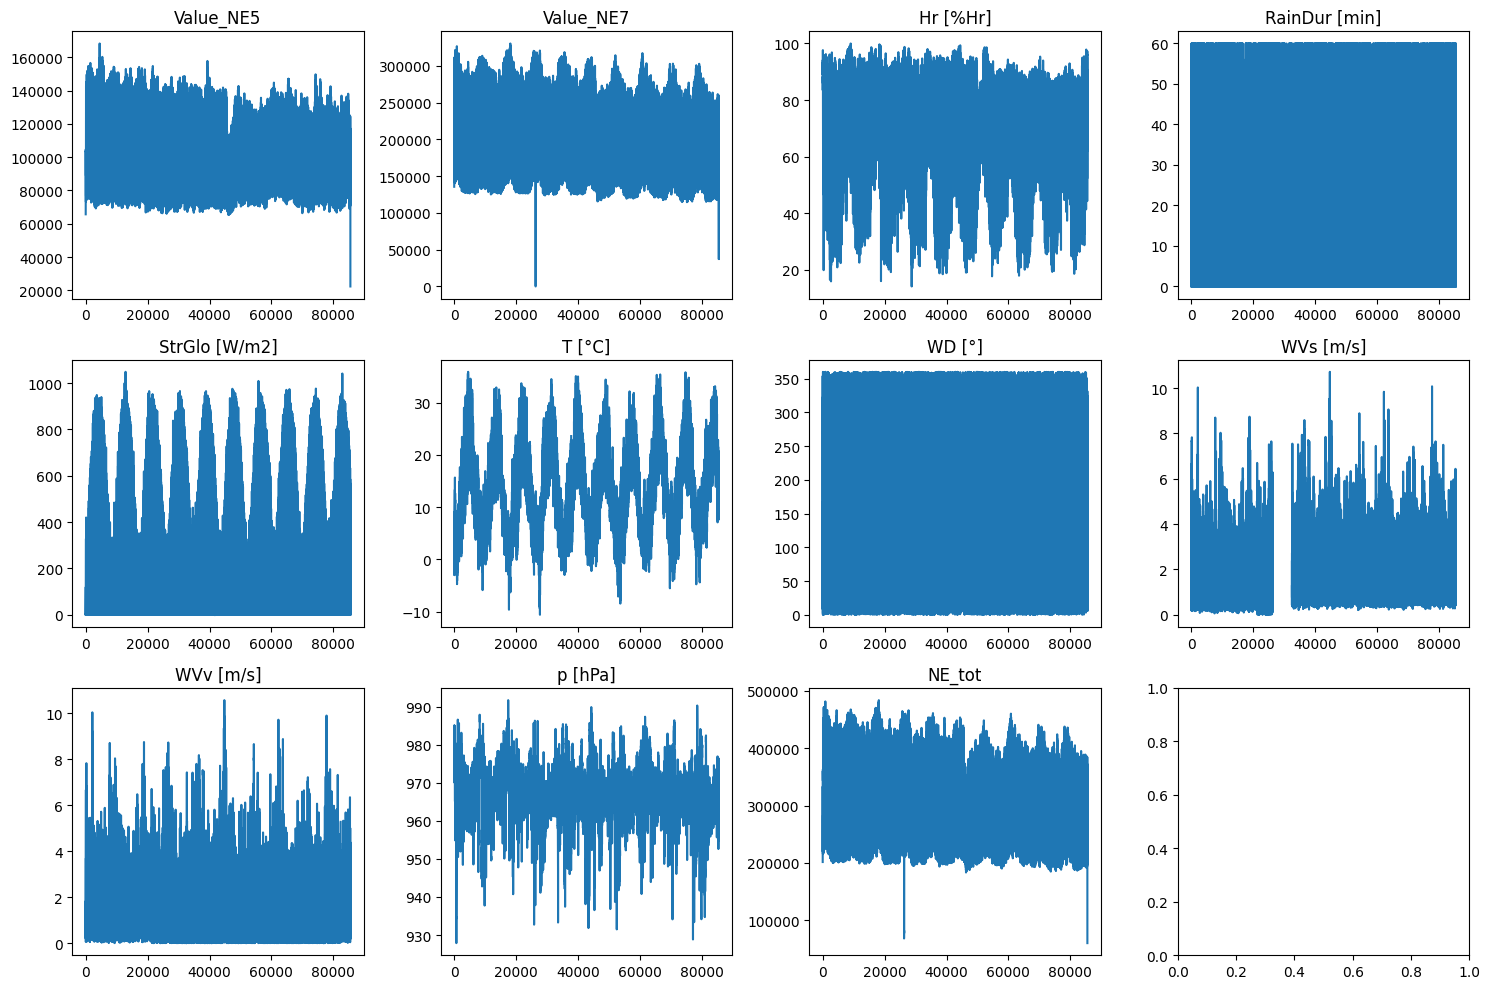

In [11]:
plot_data(df)

### Add corona feature
###### From March 18, 2020, to June 6, 2020, and from January 18, 2021, to March 3, 2021, there was a lockdown in Zurich. Add a feature that describes the status of the lockdown with 1 or 0.

In [12]:
add_corona_feature(df)
df.head()

,Unnamed: 0,Date,Value_NE5,Value_NE7,Hr [%Hr],RainDur [min],StrGlo [W/m2],T [°C],WD [°],WVs [m/s],...,Vacation,Holiday,Date_format,Year,Month,Day,Hour,Weekday,NE_tot,Corona
0,0,2014-12-31 23:00:00+00:00,65674.7507,135628.059644,89.25,0.0,0.02,-2.09,20.41,1.40,...,1.0,1.0,2014-12-31 23:00:00+00:00,2014,12,31,23,3,201302.810344,0
1,1,2015-01-01 00:00:00+00:00,88747.5885,172742.750946,90.47,0.0,0.01,-2.48,353.85,0.61,...,1.0,1.0,2015-01-01 00:00:00+00:00,2015,1,1,0,4,261490.339446,0
2,2,2015-01-01 01:00:00+00:00,86864.5321,173541.200194,89.45,0.0,0.02,-2.46,21.48,1.31,...,1.0,1.0,2015-01-01 01:00:00+00:00,2015,1,1,1,4,260405.732294,0
3,3,2015-01-01 02:00:00+00:00,84158.7339,162802.863240,89.20,0.0,0.02,-2.63,12.22,1.70,...,1.0,1.0,2015-01-01 02:00:00+00:00,2015,1,1,2,4,246961.597140,0
4,4,2015-01-01 03:00:00+00:00,81133.3041,154123.513780,89.56,0.0,0.02,-2.77,8.30,1.23,...,1.0,1.0,2015-01-01 03:00:00+00:00,2015,1,1,3,4,235256.817880,0


### Proof data types
###### There are data types such as integer or even float that are categorical.

In [13]:
print(df.dtypes)

Unnamed: 0                     int64
Date                          object
Value_NE5                    float64
Value_NE7                    float64
Hr [%Hr]                     float64
RainDur [min]                float64
StrGlo [W/m2]                float64
T [°C]                       float64
WD [°]                       float64
WVs [m/s]                    float64
WVv [m/s]                    float64
p [hPa]                      float64
Vacation                     float64
Holiday                      float64
Date_format      datetime64[ns, UTC]
Year                           int32
Month                          int32
Day                            int32
Hour                           int32
Weekday                        int32
NE_tot                       float64
Corona                         int64
dtype: object


### Clean data types
###### Set the features Vacation, Holiday, Year, Month, Day, Hour, Weekday and Corona as categorical typ.

In [14]:
df = clean_typ(df)
print(df.dtypes)

Unnamed: 0                     int64
Date                          object
Value_NE5                    float64
Value_NE7                    float64
Hr [%Hr]                     float64
RainDur [min]                float64
StrGlo [W/m2]                float64
T [°C]                       float64
WD [°]                       float64
WVs [m/s]                    float64
WVv [m/s]                    float64
p [hPa]                      float64
Vacation                    category
Holiday                     category
Date_format      datetime64[ns, UTC]
Year                        category
Month                       category
Day                         category
Hour                        category
Weekday                     category
NE_tot                       float64
Corona                      category
dtype: object


### Data cleaning (Strategy 1)
###### In this strategy, the NaN values are retained, and the implausible data are overwritten with NaN values.
###### Save this data in a csv

In [15]:
df_strategy_1 = data_cleaning_strategy_1(df)
df_strategy_1.to_csv("./data/cleaned_strategy_1.csv")

Unnamed: 0       False
Date             False
Value_NE5         True
Value_NE7         True
Hr [%Hr]          True
RainDur [min]     True
StrGlo [W/m2]     True
T [°C]            True
WD [°]            True
WVs [m/s]         True
WVv [m/s]         True
p [hPa]           True
Vacation         False
Holiday          False
Date_format      False
Year             False
Month            False
Day              False
Hour             False
Weekday          False
NE_tot            True
Corona           False
dtype: bool


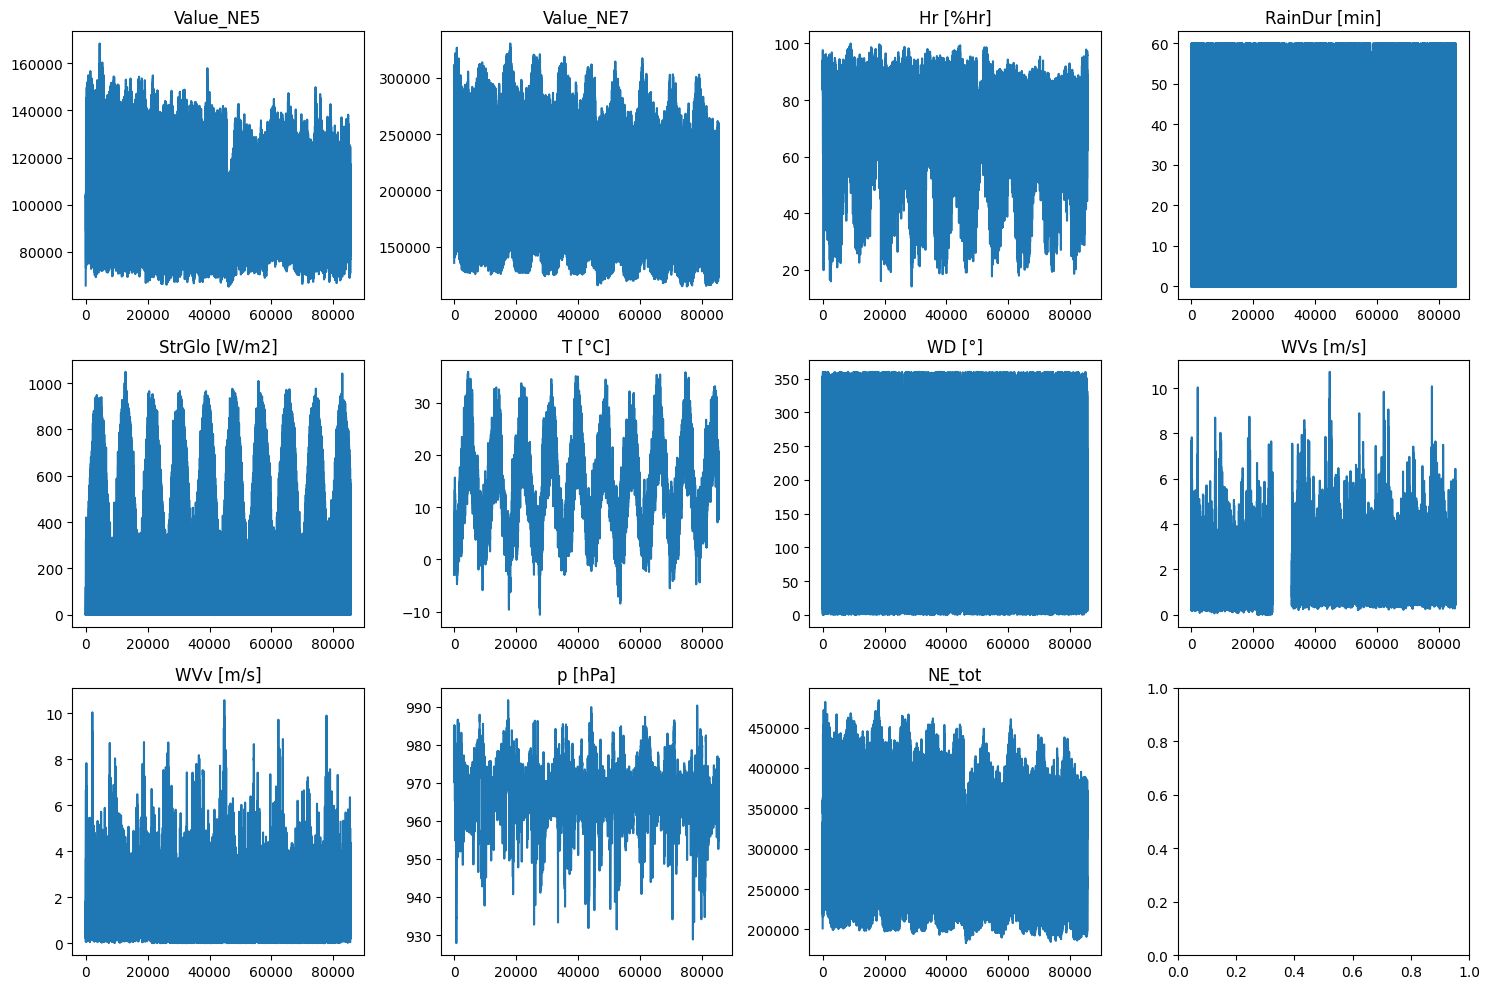

In [16]:
print(df_strategy_1.isna().any())
plot_data(df_strategy_1)

### Data cleaning (Strategy 2)
###### In this strategy, the NaN values as well as the implausible values are removed.
###### Save this data in a csv

In [17]:
df_strategy_2 = data_cleaning_strategy_2(df)
df_strategy_2.to_csv("./data/cleaned_strategy_2.csv")

Unnamed: 0       False
Date             False
Value_NE5        False
Value_NE7        False
Hr [%Hr]         False
RainDur [min]    False
StrGlo [W/m2]    False
T [°C]           False
WD [°]           False
WVs [m/s]        False
WVv [m/s]        False
p [hPa]          False
Vacation         False
Holiday          False
Date_format      False
Year             False
Month            False
Day              False
Hour             False
Weekday          False
NE_tot           False
Corona           False
dtype: bool


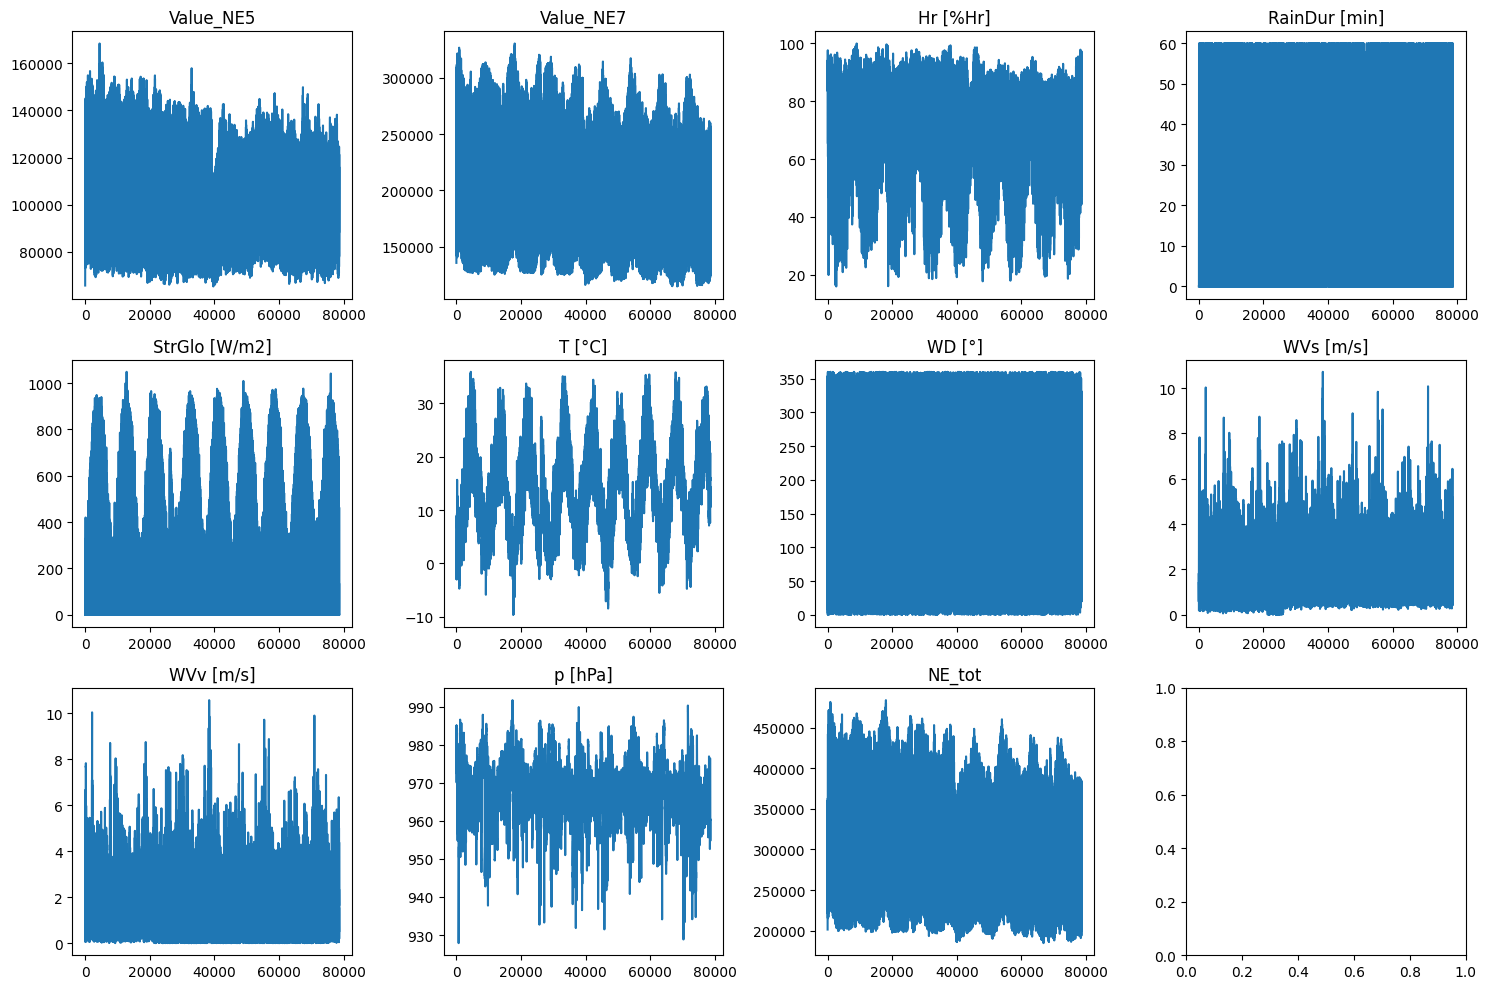

In [18]:
print(df_strategy_2.isna().any())
plot_data(df_strategy_2)

### Data cleaning (Strategy 3)
###### In this strategy, the NaN values as well as the implausible values are replaced by the mean. The mean is calculated from the values where the Month, Day, and Hour are identical.
###### Save this data in a csv

In [19]:
df_strategy_3 = data_cleaning_strategy_3(df)
df_strategy_3.to_csv("./data/cleaned_strategy_3.csv")

Unnamed: 0       False
Date             False
Value_NE5        False
Value_NE7        False
Hr [%Hr]         False
RainDur [min]    False
StrGlo [W/m2]    False
T [°C]           False
WD [°]           False
WVs [m/s]        False
WVv [m/s]        False
p [hPa]          False
Vacation         False
Holiday          False
Date_format      False
Year             False
Month            False
Day              False
Hour             False
Weekday          False
NE_tot           False
Corona           False
dtype: bool


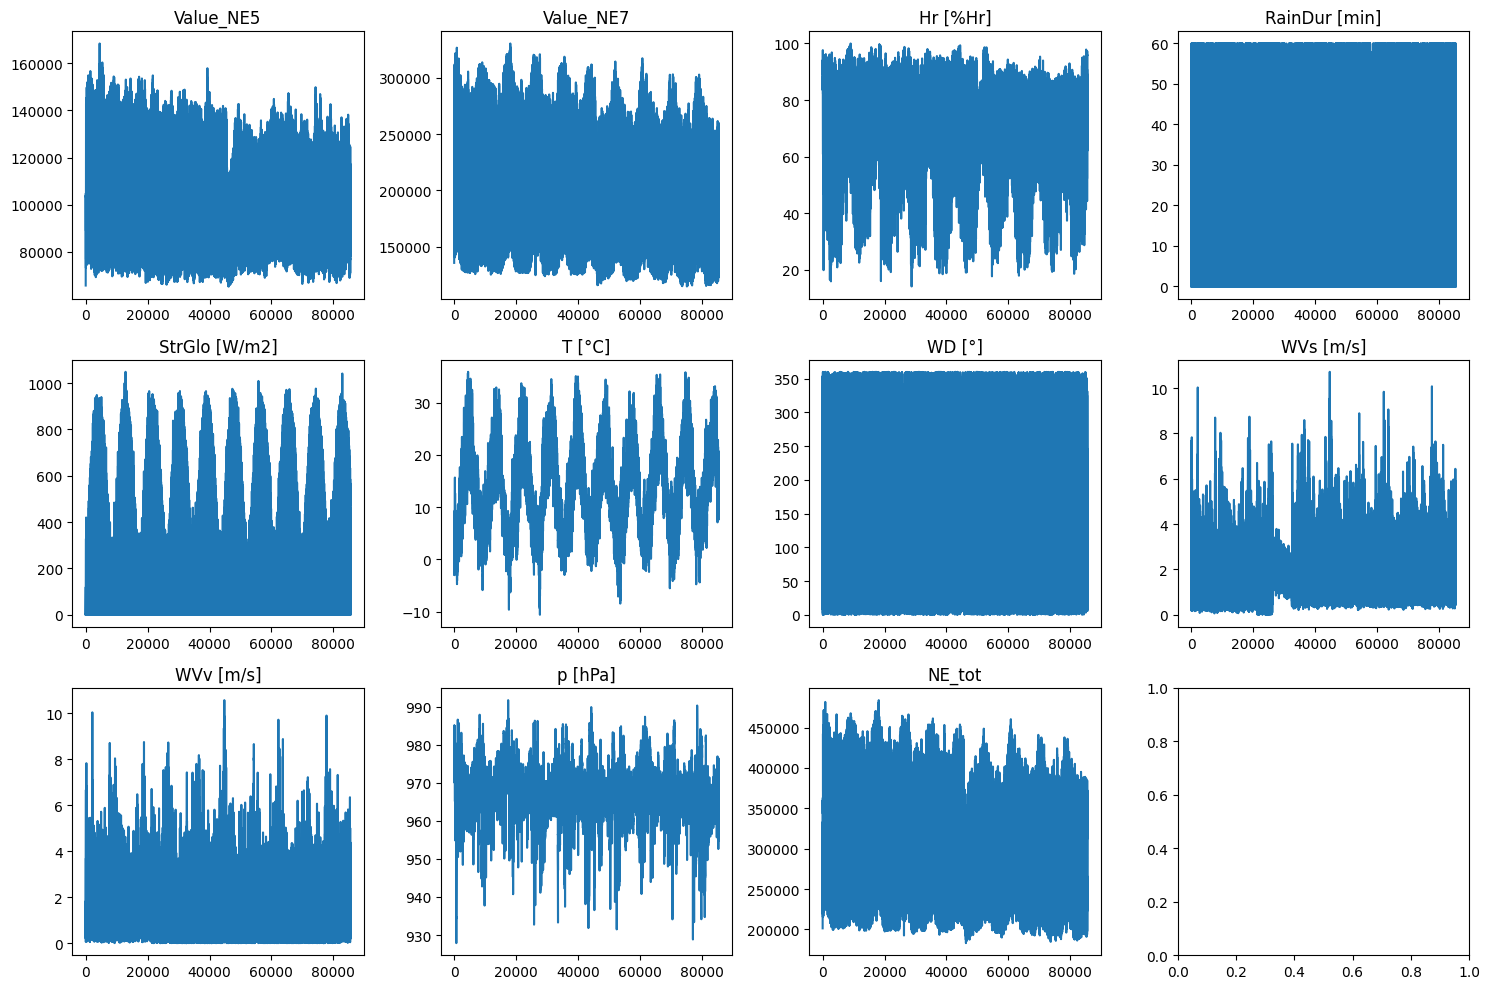

In [20]:
print(df_strategy_3.isna().any())
plot_data(df_strategy_3)